In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# IMPORT DATA

In [ ]:
df = pd.read_excel('../Data/obesity raw.xlsx')

In [9]:
df

,Unnamed: 0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,493,Male,20,1.80,65.0,no,yes,2,3,Frequently,no,1,no,2,0,Sometimes,Motorbike,Normal_Weight
494,494,Female,18,1.67,66.0,no,yes,3,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Normal_Weight
495,495,Male,19,1.80,60.0,yes,yes,3,1,Always,no,1,yes,0,0,no,Motorbike,Normal_Weight
496,496,Male,18,1.72,53.0,yes,yes,2,3,Sometimes,no,2,no,0,2,Sometimes,Public_Transportation,Insufficient_Weight


In [10]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# EDA

In [11]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,23.146586,1.686386,69.569880,2.325301,2.658635,1.923695,1.162651,0.660643
std,6.721583,0.097653,17.013226,0.590504,0.919242,0.678945,1.024671,0.722794
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.612500,58.000000,2.000000,3.000000,1.000000,0.000000,0.000000
50%,21.000000,1.680000,67.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,24.000000,1.750000,80.000000,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

In [13]:
for column in categorical_features:
    if column != 'Age': 
        print(df[column].value_counts())
        print()

Gender
Male      271
Female    227
Name: count, dtype: int64

family_history_with_overweight
yes    300
no     198
Name: count, dtype: int64

FAVC
yes    348
no     150
Name: count, dtype: int64

CAEC
Sometimes     289
Frequently    136
Always         53
no             20
Name: count, dtype: int64

SMOKE
no     466
yes     32
Name: count, dtype: int64

SCC
no     443
yes     55
Name: count, dtype: int64

CALC
Sometimes     273
no            179
Frequently     45
Always          1
Name: count, dtype: int64

MTRANS
Public_Transportation    326
Automobile                99
Walking                   55
Motorbike                 11
Bike                       7
Name: count, dtype: int64

NObeyesdad
Normal_Weight          287
Overweight_Level_I      58
Overweight_Level_II     58
Obesity_Type_I          47
Insufficient_Weight     34
Obesity_Type_II         11
Obesity_Type_III         3
Name: count, dtype: int64



# TRANSFORM KATEGORIK KE NUMERIK

In [14]:
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [15]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [17]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

# SPLIT DATA

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [20]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

# MODEL NEURAL NETWORK

In [21]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(16,)),
        Dense(32, activation='hard_sigmoid', name='L1'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(32, activation='hard_sigmoid', name='L2'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(7, activation='softmax', name='L3')
    ], name="my_model"
)


In [22]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,087 (8.15 KB)

 Trainable params: 1,959 (7.65 KB)

 Non-trainable params: 128 (512.00 B)

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1694 - loss: 2.2302 - val_accuracy: 0.0000e+00 - val_loss: 2.0920
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2973 - loss: 1.8027 - val_accuracy: 0.0000e+00 - val_loss: 1.8958
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3882 - loss: 1.6471 - val_accuracy: 0.4500 - val_loss: 1.7438
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5320 - loss: 1.4371 - val_accuracy: 0.5750 - val_loss: 1.6211
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5100 - loss: 1.3773 - val_accuracy: 0.5750 - val_loss: 1.5209
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5551 - loss: 1.3428 - val_accuracy: 0.5750 - val_loss: 1.4212
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5593 - loss: 1.2467 - val_accuracy: 0.6000 - val_loss: 1.3338
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6245 - loss: 1.1512 - val_accuracy: 0.

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Akurasi Model: {accuracy*100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6586 - loss: 0.8550  
Akurasi Model: 67.00%


In [26]:
import matplotlib.pyplot as plt

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


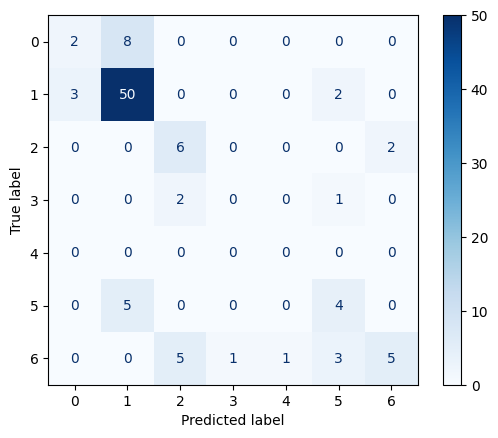

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  
y_test_class = np.argmax(y_test, axis=1)


cm = confusion_matrix(y_test_class, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

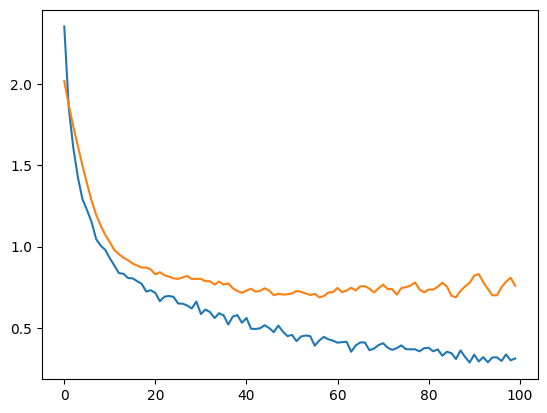

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

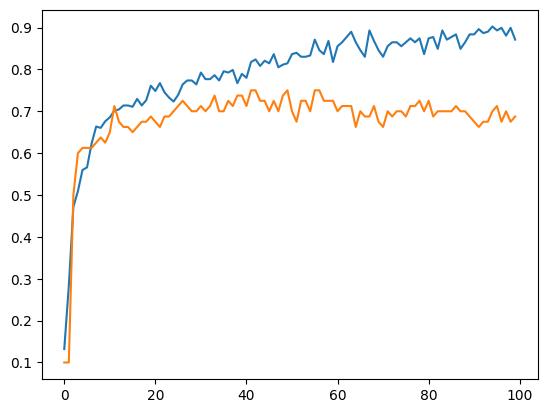

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# CEK CV MEAN SCORE

In [ ]:
from scikeras.wrappers import KerasClassifier
def create_model():
    model = Sequential([
        tf.keras.Input(shape=(16,)),
        Dense(32, activation='hard_sigmoid', name='L1'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(32, activation='hard_sigmoid', name='L2'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(7, activation='softmax', name='L3')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print(f'Mean Accuracy: {np.mean(scores):.4f}')
print(f'Standard Deviation: {np.std(scores):.4f}')

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error 

Mean Accuracy: 0.4878
Standard Deviation: 0.1743


# CEK PRESISI, RECALL, F1

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracies = []
precisions = []
recalls = []
f1_scores = []


def create_model():
    model = Sequential(
        [
            tf.keras.Input(shape=(16,)),
            Dense(32, activation='hard_sigmoid', name='L1'),
            BatchNormalization(),
            Dropout(0.1),
            Dense(32, activation='hard_sigmoid', name='L2'),
            BatchNormalization(),
            Dropout(0.1),
            Dense(7, activation='softmax', name='L3')
        ], name="my_model"
    )
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

for train_index, val_index in kf.split(X, y):  
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

   
    y_train_one_hot = to_categorical(y_train, num_classes=7)
    y_val_one_hot = to_categorical(y_val, num_classes=7)

    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)  

    y_pred = model.predict(X_val)
    y_pred_class = np.argmax(y_pred, axis=1)

 
    accuracy = accuracy_score(y_val, y_pred_class)
    precision = precision_score(y_val, y_pred_class, average='weighted')
    recall = recall_score(y_val, y_pred_class, average='weighted')
    f1 = f1_score(y_val, y_pred_class, average='weighted')

    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)


mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)


print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Mean Precision: {mean_precision:.4f}')
print(f'Mean Recall: {mean_recall:.4f}')
print(f'Mean F1 Score: {mean_f1:.4f}')

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Mean Accuracy: 0.5843
Mean Precision: 0.4044
Mean Recall: 0.5843
Mean F1 Score: 0.4649


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
